In [56]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [57]:
data = pd.read_csv('uber_rides_data.csv')
data.shape

(564516, 4)

In [58]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [59]:
clus = data[['Lat','Lon']]
clus.shape

(564516, 2)

In [60]:
from sklearn.cluster import KMeans

In [61]:
kmeans = KMeans(n_clusters=6, max_iter=300, random_state=1234)
kmeans.fit(clus)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

In [62]:
centroids = kmeans.cluster_centers_
centroids

array([[ 40.76555831, -73.9728178 ],
       [ 40.7005414 , -74.20167303],
       [ 40.68860278, -73.96555041],
       [ 40.79808351, -73.86879949],
       [ 40.65952565, -73.7740721 ],
       [ 40.73113043, -73.99860971]])

In [63]:
new_location = [[40.6556, -73.5631]]
kmeans.predict(new_location)

array([4])

In [64]:
clocation=pd.DataFrame(centroids, columns=['Latitude','Longitude'])
clocation

,Latitude,Longitude
0,40.765558,-73.972818
1,40.700541,-74.201673
2,40.688603,-73.965550
3,40.798084,-73.868799
4,40.659526,-73.774072
5,40.731130,-73.998610


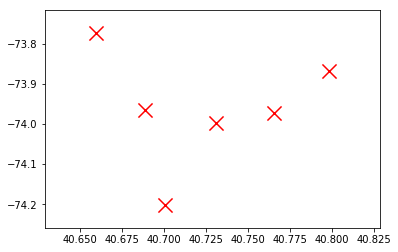

In [65]:
plt.scatter(clocation['Latitude'],clocation['Longitude'],marker='x', color='R',s=200)

In [66]:
import folium

In [67]:
centroid = clocation.values.tolist()
map = folium.Map(location=[40.79658011772687, -73.87341741832425])
for point in range(0,len(centroid)):
    folium.Marker(centroid[point], popup = centroid[point]).add_to(map)

In [68]:
map